In [60]:
import math
from collections import Counter

data = [
    {"CGPA": 8.7, "Interactive": "Yes", "Practical": "Excellent", "Communication": "Excellent", "JobOffer": "Yes"},
    {"CGPA": 6.2, "Interactive": "No", "Practical": "Poor", "Communication": "Poor", "JobOffer": "No"},
    {"CGPA": 7.5, "Interactive": "Yes", "Practical": "Good", "Communication": "Moderate", "JobOffer": "Yes"},
    {"CGPA": 5.9, "Interactive": "No", "Practical": "Average", "Communication": "Poor", "JobOffer": "No"},
    {"CGPA": 9.1, "Interactive": "Yes", "Practical": "Excellent", "Communication": "Excellent", "JobOffer": "Yes"},
    {"CGPA": 6.8, "Interactive": "No", "Practical": "Average", "Communication": "Moderate", "JobOffer": "No"},
    {"CGPA": 8.3, "Interactive": "Yes", "Practical": "Excellent", "Communication": "Good", "JobOffer": "Yes"},
    {"CGPA": 5.4, "Interactive": "No", "Practical": "Poor", "Communication": "Poor", "JobOffer": "No"},
]

def discretize_cgpa(cgpa):
    if cgpa >= 9:
        return "High"
    elif cgpa >= 8:
        return "Medium"
    else:
        return "Low"

for record in data:
    record["CGPA"] = discretize_cgpa(record["CGPA"])

def entropy(data_subset):
    labels = [record["JobOffer"] for record in data_subset]
    total = len(labels)
    counts = Counter(labels)
    ent = 0.0
    for count in counts.values():
        p = count / total
        ent -= p * math.log2(p)
    return ent

def info_gain(data_subset, attribute):
    total_entropy = entropy(data_subset)
    values = set(record[attribute] for record in data_subset)
    weighted_entropy = 0.0
    total = len(data_subset)
    for val in values:
        subset = [record for record in data_subset if record[attribute] == val]
        weighted_entropy += (len(subset) / total) * entropy(subset)
    gain = total_entropy - weighted_entropy
    return gain

def majority_class(data_subset):
    labels = [record["JobOffer"] for record in data_subset]
    return Counter(labels).most_common(1)[0][0]

def id3(data_subset, attributes):
    labels = [record["JobOffer"] for record in data_subset]
    if len(set(labels)) == 1:
        return labels[0]
    if not attributes:
        return majority_class(data_subset)
    gains = [(attr, info_gain(data_subset, attr)) for attr in attributes]
    best_attr, best_gain = max(gains, key=lambda x: x[1])
    if best_gain == 0:
        return majority_class(data_subset)
    tree = {best_attr: {}}
    values = set(record[best_attr] for record in data_subset)
    for val in values:
        subset = [record for record in data_subset if record[best_attr] == val]
        if not subset:
            tree[best_attr][val] = majority_class(data_subset)
        else:
            remaining_attrs = [a for a in attributes if a != best_attr]
            tree[best_attr][val] = id3(subset, remaining_attrs)
    return tree

attributes = ["CGPA", "Interactive", "Practical", "Communication"]
decision_tree = id3(data, attributes)

import pprint
pprint.pprint(decision_tree)

def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree
    attribute = next(iter(tree))
    attribute_value = sample.get(attribute)
    if attribute_value in tree[attribute]:
        subtree = tree[attribute][attribute_value]
    else:
        return None
    return predict(subtree, sample)

# Example prediction
new_sample = {
    "CGPA": discretize_cgpa(7.1),
    "Interactive": "Yes",
    "Practical": "Good",
    "Communication": "Moderate"
}

prediction = predict(decision_tree, new_sample)
print(f"Predicted JobOffer: {prediction}")

{'Interactive': {'No': 'No', 'Yes': 'Yes'}}
Predicted JobOffer: Yes


In [2]:
def get_user_input():# using the sample input and calculate the prediction
    cgpa_input = float(input("Enter CGPA (e.g., 7.1): "))
    cgpa = discretize_cgpa(cgpa_input)

    interactive = input("Interactive (Yes/No): ").strip().capitalize()
    while interactive not in {"Yes", "No"}:
        interactive = input("Please enter 'Yes' or 'No' for Interactive: ").strip().capitalize()

    practical = input("Practical (Poor/Average/Good/Excellent): ").strip().capitalize()
    while practical not in {"Poor", "Average", "Good", "Excellent"}:
        practical = input("Please enter a valid Practical value (Poor/Average/Good/Excellent): ").strip().capitalize()

    communication = input("Communication (Poor/Moderate/Good/Excellent): ").strip().capitalize()
    while communication not in {"Poor", "Moderate", "Good", "Excellent"}:
        communication = input("Please enter a valid Communication value (Poor/Moderate/Good/Excellent): ").strip().capitalize()

    return {
        "CGPA": cgpa,
        "Interactive": interactive,
        "Practical": practical,
        "Communication": communication
    }

new_sample = get_user_input()

prediction = predict(decision_tree, new_sample)
print(f"Predicted JobOffer: {prediction}")


Enter CGPA (e.g., 7.1):  7.69
Interactive (Yes/No):  Yes
Practical (Poor/Average/Good/Excellent):  Good
Communication (Poor/Moderate/Good/Excellent):  Good


Predicted JobOffer: Yes


In [8]:
import pandas as pd

dat=pd.DataFrame(data)

In [15]:
print(dat.head())

     CGPA Interactive  Practical Communication JobOffer
0  Medium         Yes  Excellent     Excellent      Yes
1     Low          No       Poor          Poor       No
2     Low         Yes       Good      Moderate      Yes
3     Low          No    Average          Poor       No
4    High         Yes  Excellent     Excellent      Yes


In [24]:
print(dat.tail(-5))

     CGPA Interactive  Practical Communication JobOffer
5     Low          No    Average      Moderate       No
6  Medium         Yes  Excellent          Good      Yes
7     Low          No       Poor          Poor       No


In [26]:
print(dat.shape)

(8, 5)


In [27]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CGPA           8 non-null      object
 1   Interactive    8 non-null      object
 2   Practical      8 non-null      object
 3   Communication  8 non-null      object
 4   JobOffer       8 non-null      object
dtypes: object(5)
memory usage: 452.0+ bytes
None


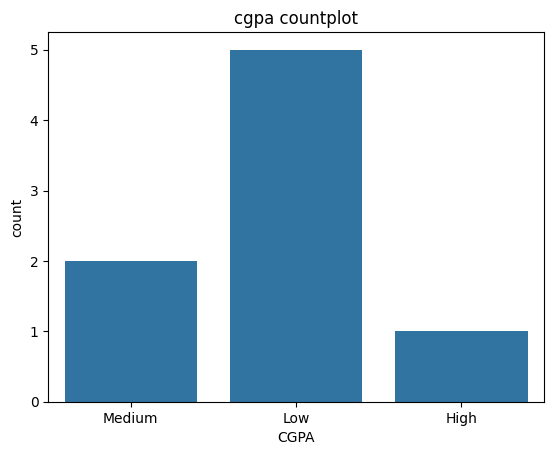

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=dat,x='CGPA')
plt.title('cgpa countplot')
plt.show()

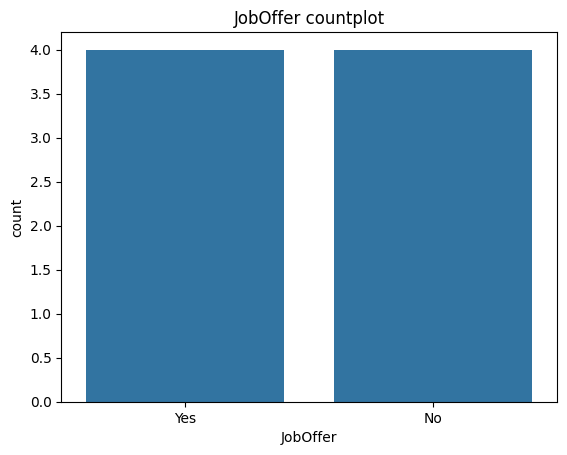

In [29]:
sns.countplot(data=dat,x='JobOffer')
plt.title('JobOffer countplot')
plt.show()

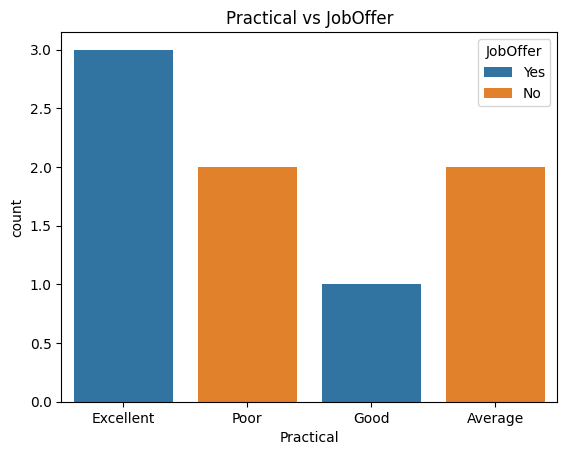

In [30]:
sns.countplot(data=dat,x='Practical', hue='JobOffer')
plt.title('Practical vs JobOffer')
plt.show()

In [65]:
def get_user_record():
    def discretize_cgpa(cgpa):
        if cgpa >= 9:
            return "High"
        elif cgpa >= 8:
            return "Medium"
        else:
            return "Low"

    while True:
        try:
            cgpa_input = float(input("Enter CGPA (e.g., 7.1): "))
            break
        except ValueError:
            print("Invalid input. Please enter a numeric CGPA.")

    cgpa = discretize_cgpa(cgpa_input)

    interactive = input("Interactive (Yes/No): ").strip().capitalize()
    while interactive not in {"Yes", "No"}:
        interactive = input("Please enter 'Yes' or 'No' for Interactive: ").strip().capitalize()

    practical = input("Practical (Poor/Average/Good/Excellent): ").strip().capitalize()
    while practical not in {"Poor", "Average", "Good", "Excellent"}:
        practical = input("Please enter a valid Practical value (Poor/Average/Good/Excellent): ").strip().capitalize()

    communication = input("Communication (Poor/Moderate/Good/Excellent): ").strip().capitalize()
    while communication not in {"Poor", "Moderate", "Good", "Excellent"}:
        communication = input("Please enter a valid Communication value (Poor/Moderate/Good/Excellent): ").strip().capitalize()

    record = {
        "CGPA": cgpa,
        "Interactive": interactive,
        "Practical": practical,
        "Communication": communication,
    }
    record["JobOffer"] =   predict(decision_tree, record)
    return record

import pandas as pd

def add_record_to_dataframe(dat):
    record = get_user_record()

    new_row = pd.DataFrame([record])
    dat = pd.concat([dat, new_row], ignore_index=True)
    print("New record added successfully!")
    return dat

dat = add_record_to_dataframe(dat)

Enter CGPA (e.g., 7.1):  5
Interactive (Yes/No):  Yes
Practical (Poor/Average/Good/Excellent):  Good
Communication (Poor/Moderate/Good/Excellent):  Good


New record added successfully!


In [37]:
print(dat.head(9))

     CGPA Interactive  Practical Communication JobOffer
0  Medium         Yes  Excellent     Excellent      Yes
1     Low          No       Poor          Poor       No
2     Low         Yes       Good      Moderate      Yes
3     Low          No    Average          Poor       No
4    High         Yes  Excellent     Excellent      Yes
5     Low          No    Average      Moderate       No
6  Medium         Yes  Excellent          Good      Yes
7     Low          No       Poor          Poor       No


In [40]:
print(dat.shape)

(9, 5)


In [43]:
print(dat.describe(include="all"))

       CGPA Interactive  Practical Communication JobOffer
count     9           9          9             9        8
unique    3           2          4             4        2
top     Low         Yes  Excellent          Poor      Yes
freq      6           5          3             3        4


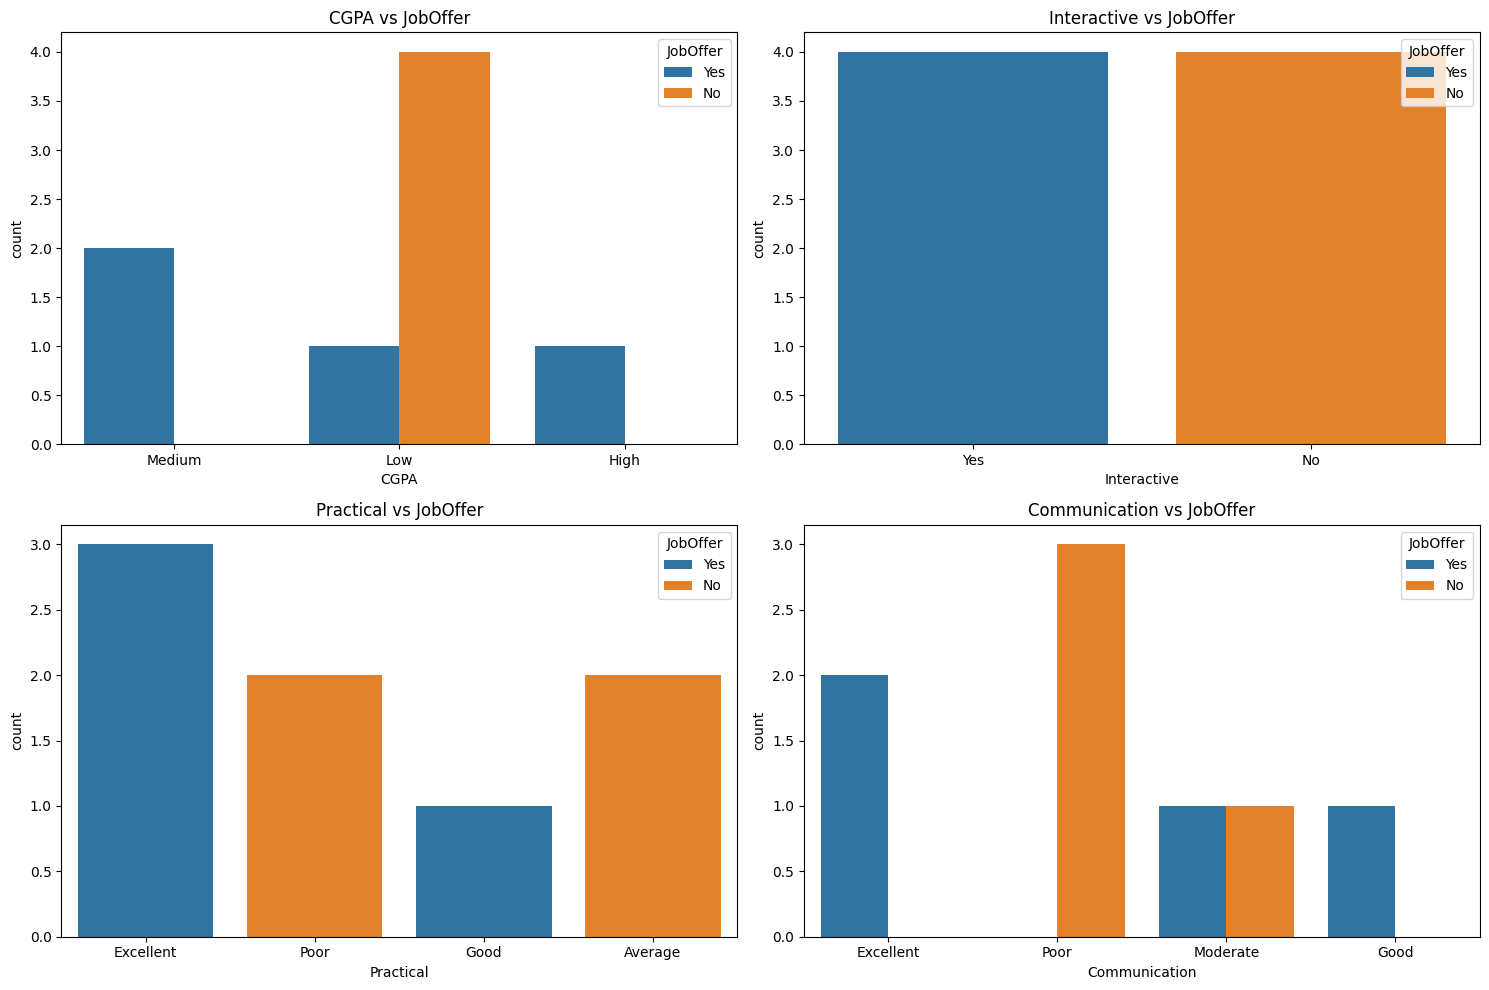

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_feature=["CGPA", "Interactive", "Practical", "Communication"]
plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_feature,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dat,x=feature,hue="JobOffer")
    plt.title(f'{feature} vs JobOffer')
    plt.legend(title='JobOffer')#
plt.tight_layout()#
plt.show()

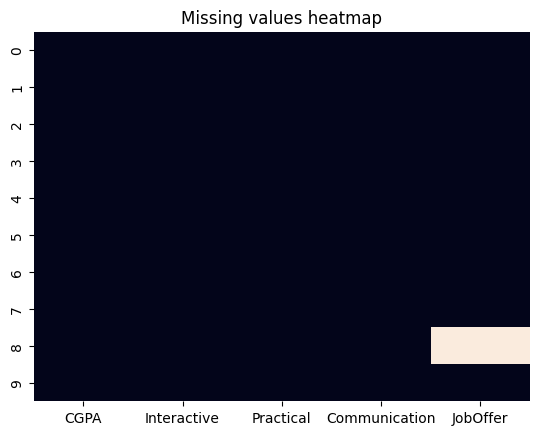

In [58]:
sns.heatmap(dat.isnull(),cbar=False)
plt.title('Missing values heatmap')
plt.show()

In [67]:
print(dat.head(11))

      CGPA Interactive  Practical Communication JobOffer
0   Medium         Yes  Excellent     Excellent      Yes
1      Low          No       Poor          Poor       No
2      Low         Yes       Good      Moderate      Yes
3      Low          No    Average          Poor       No
4     High         Yes  Excellent     Excellent      Yes
5      Low          No    Average      Moderate       No
6   Medium         Yes  Excellent          Good      Yes
7      Low          No       Poor          Poor       No
8      Low         Yes       Good          Good      NaN
9      Low         Yes       Good          Good      Yes
10     Low         Yes       Good          Good      Yes


In [63]:
# ... (Your existing code here)

overall_entropy = entropy(data)
print(f"Overall Entropy (JobOffer): {overall_entropy:.4f}")

for attr in attributes:
    gain = info_gain(data, attr)
    print(f"Information Gain for '{attr}': {gain:.4f}")


Overall Entropy (JobOffer): 1.0000
Information Gain for 'CGPA': 0.5488
Information Gain for 'Interactive': 1.0000
Information Gain for 'Practical': 1.0000
Information Gain for 'Communication': 0.7500


In [64]:
def entropy_per_category(data_subset, attribute):
    values = set(record[attribute] for record in data_subset)
    print(f"\nEntropy per category for attribute '{attribute}':")
    for val in values:
        subset = [record for record in data_subset if record[attribute] == val]
        ent = entropy(subset)
        print(f"  {val}: Entropy = {ent:.4f} (Count = {len(subset)})")

for attr in attributes:
    entropy_per_category(data, attr)



Entropy per category for attribute 'CGPA':
  Low: Entropy = 0.7219 (Count = 5)
  Medium: Entropy = 0.0000 (Count = 2)
  High: Entropy = 0.0000 (Count = 1)

Entropy per category for attribute 'Interactive':
  Yes: Entropy = 0.0000 (Count = 4)
  No: Entropy = 0.0000 (Count = 4)

Entropy per category for attribute 'Practical':
  Good: Entropy = 0.0000 (Count = 1)
  Poor: Entropy = 0.0000 (Count = 2)
  Excellent: Entropy = 0.0000 (Count = 3)
  Average: Entropy = 0.0000 (Count = 2)

Entropy per category for attribute 'Communication':
  Good: Entropy = 0.0000 (Count = 1)
  Poor: Entropy = 0.0000 (Count = 3)
  Excellent: Entropy = 0.0000 (Count = 2)
  Moderate: Entropy = 1.0000 (Count = 2)


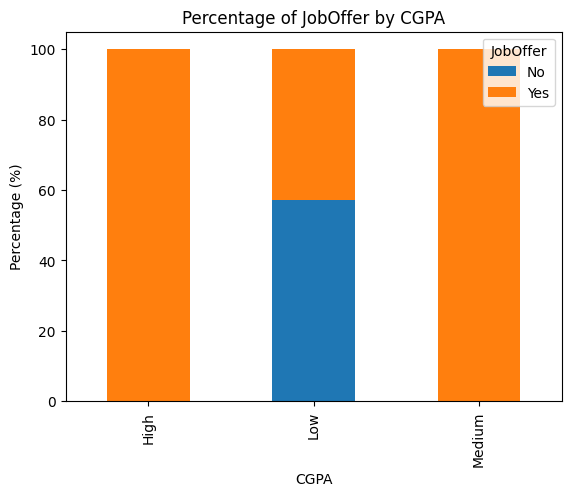

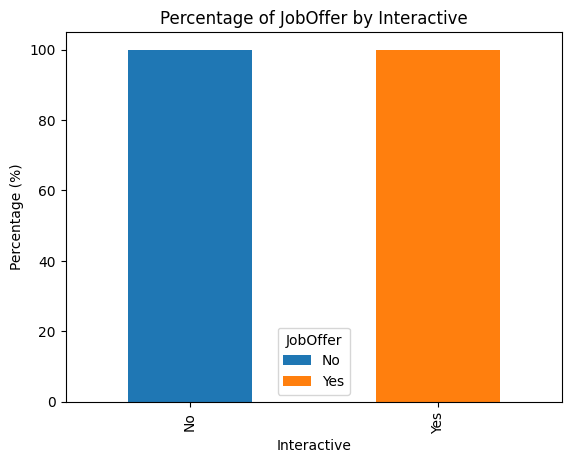

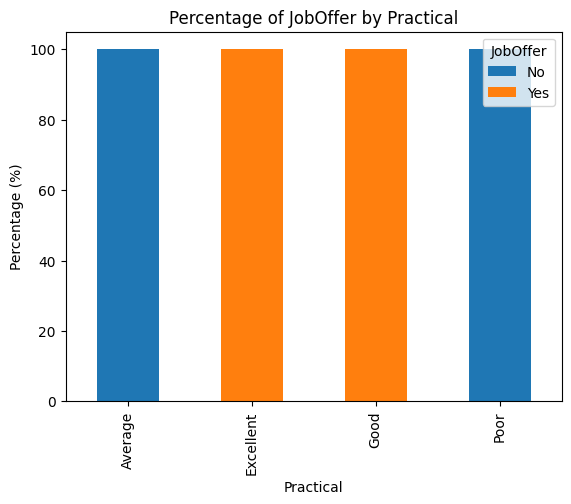

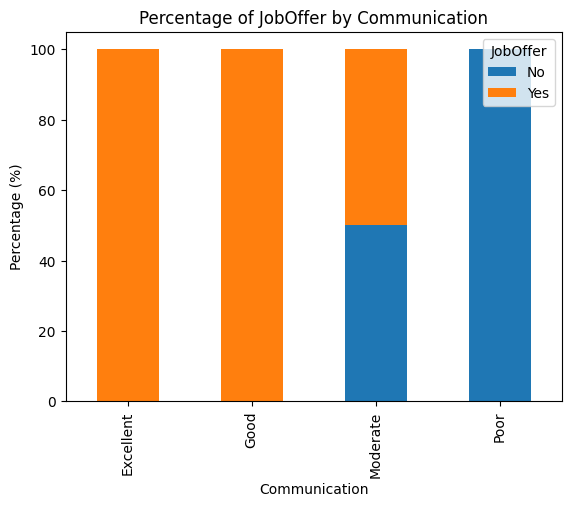

In [68]:
import pandas as pd

for feature in categorical_features:
    ct = pd.crosstab(dat[feature], dat["JobOffer"], normalize='index') * 100
    ct.plot(kind='bar', stacked=True)
    plt.title(f'Percentage of JobOffer by {feature}')
    plt.ylabel('Percentage (%)')
    plt.show()
